In [1]:
include("functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


In [2]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.01, 0.29, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.1
λ2 = 1.5
vf = 1.0

# Create an instance of the Constants struct
constants = fuSimpleConstants(N, L, b, λ2, vf)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]

## Compute solution branch
@time solutions = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-12, solver = :Broyden, max_iter = 5000);

Solution branch already exists.
File: results/fuSimple/fuSimple_16-03_22-08-22_2025.jld2
  1.957389 seconds (10.57 M allocations: 536.941 MiB, 3.06% gc time, 99.88% compilation time: 33% of which was recompilation)


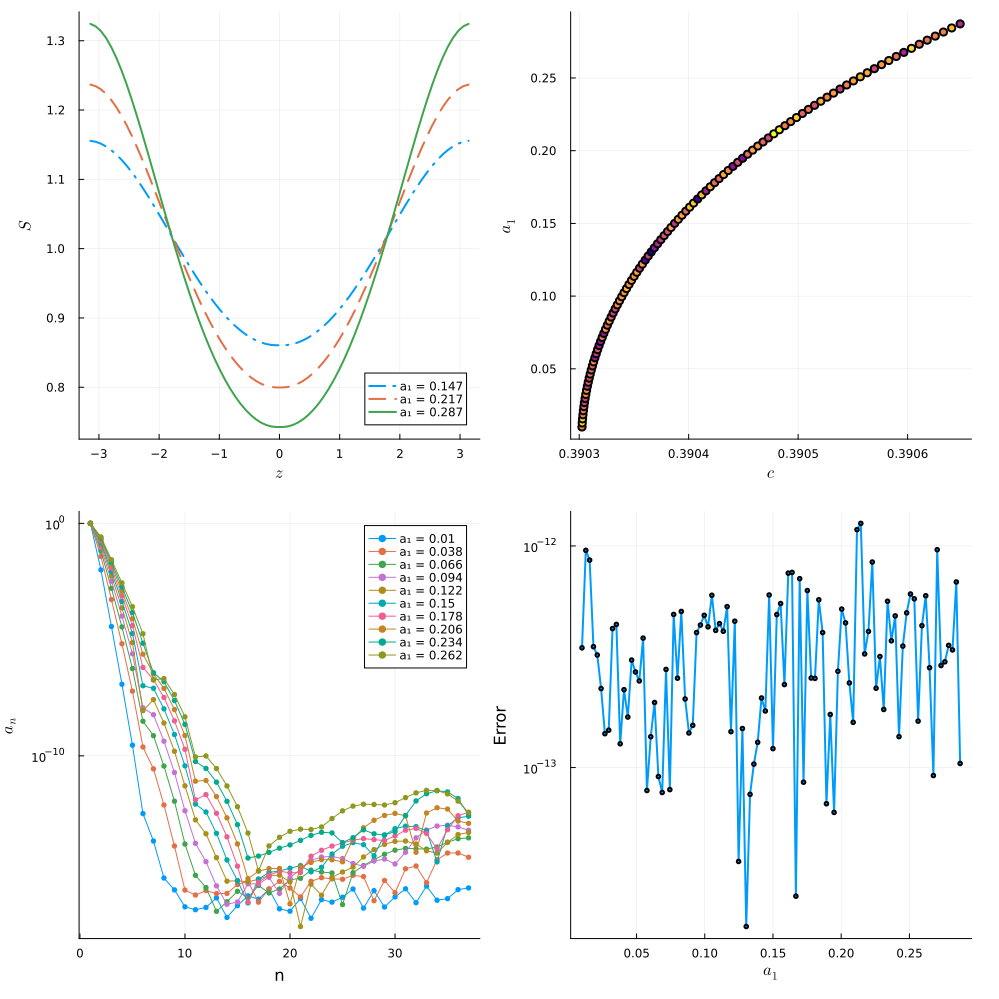

In [2]:
solutions, constants, metadata = readSolution("results/fuSimple/fuSimple_16-03_22-08-22_2025.jld2")

profileplot = plot_profiles(solutions, constants, shift_profiles = true)
branchplot = plot_branch(solutions, metadata)
coeffplot = plot_coeffs(solutions, 1:10:100)
errorplot = plot_error(solutions, metadata)

plot(profileplot, branchplot, coeffplot, errorplot, layout = (2,2), size = (1000,1000))

┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

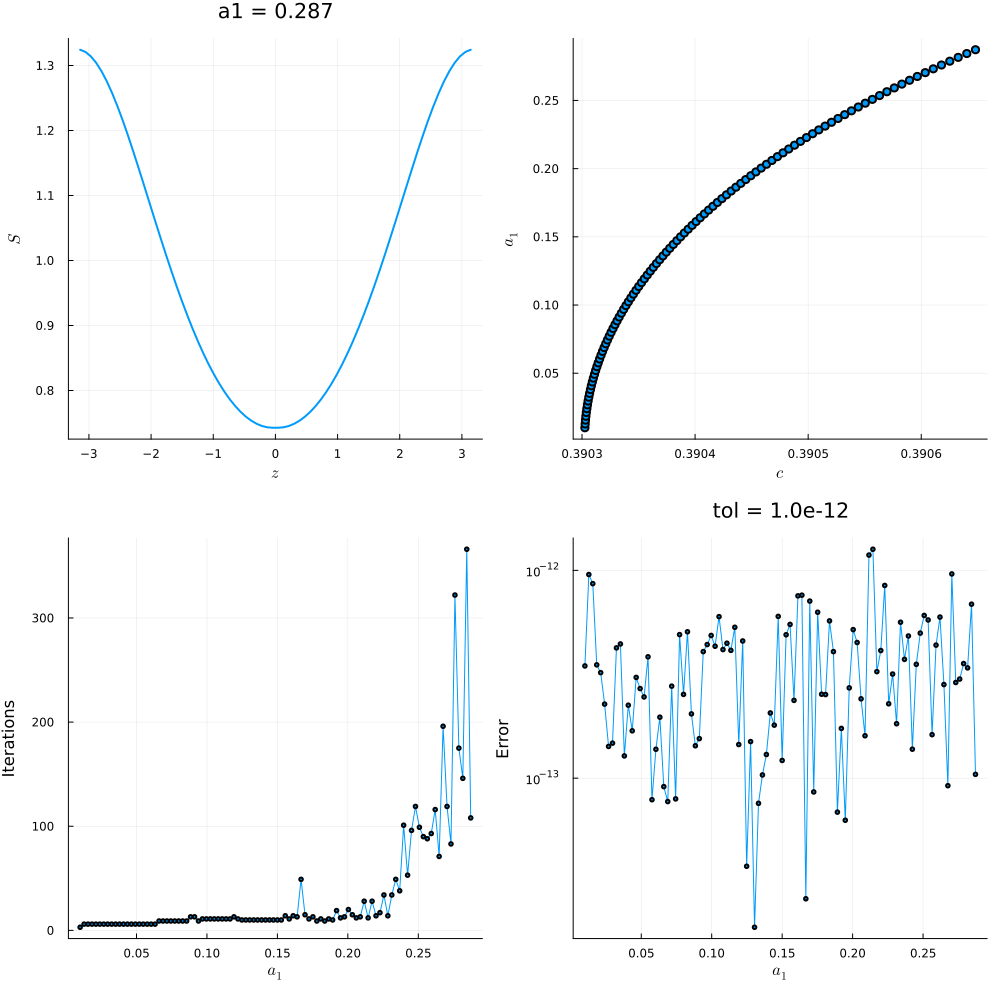

In [4]:
# plotting 
file_name = "36.1.0e-12.100.Broyden"
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting(file_name)
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

# get the constants for this run from the metadata file 


┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

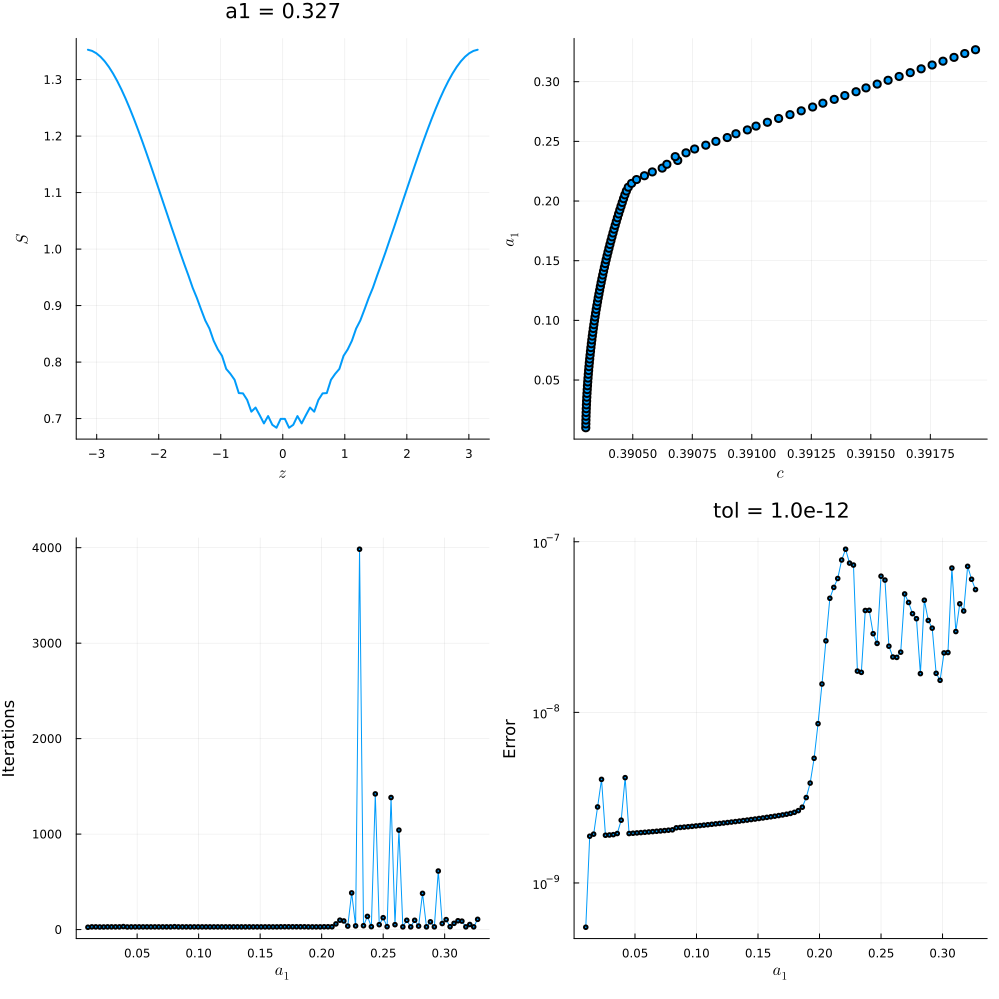

In [15]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("46.1.0e-12.100.LevenbergMarquardt")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

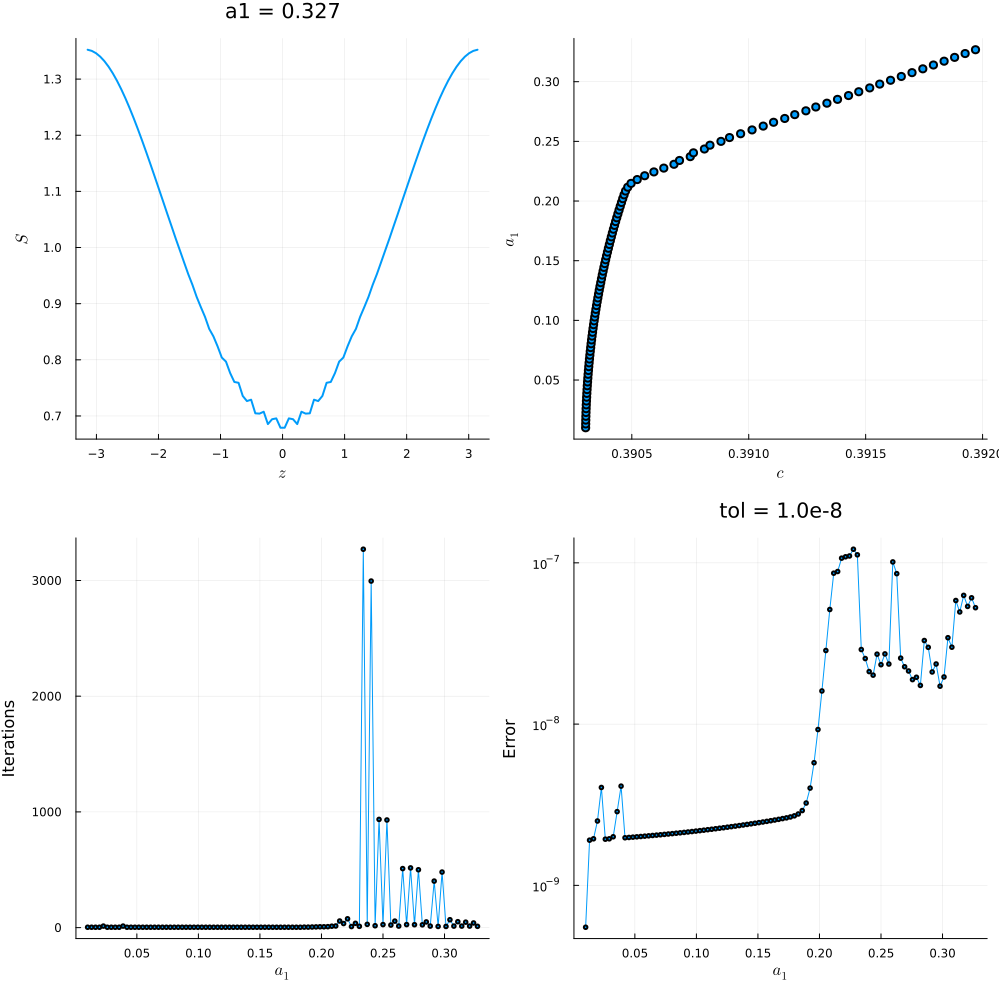

In [6]:
# plotting
profile_plot, branch_plot, coeff_plot, convergence_plot, error_plot = plotting("46.1.0e-8.100.LevenbergMarquardt")
plot(profile_plot, branch_plot, convergence_plot, error_plot, size=(1000,1000), layout = (2,2))

#### choosing parameters 
* plot $c_0$ vs. parameters (3-4 plots)
* doesn't matter if $c$, $omega$, etc. (look at wikipedia)

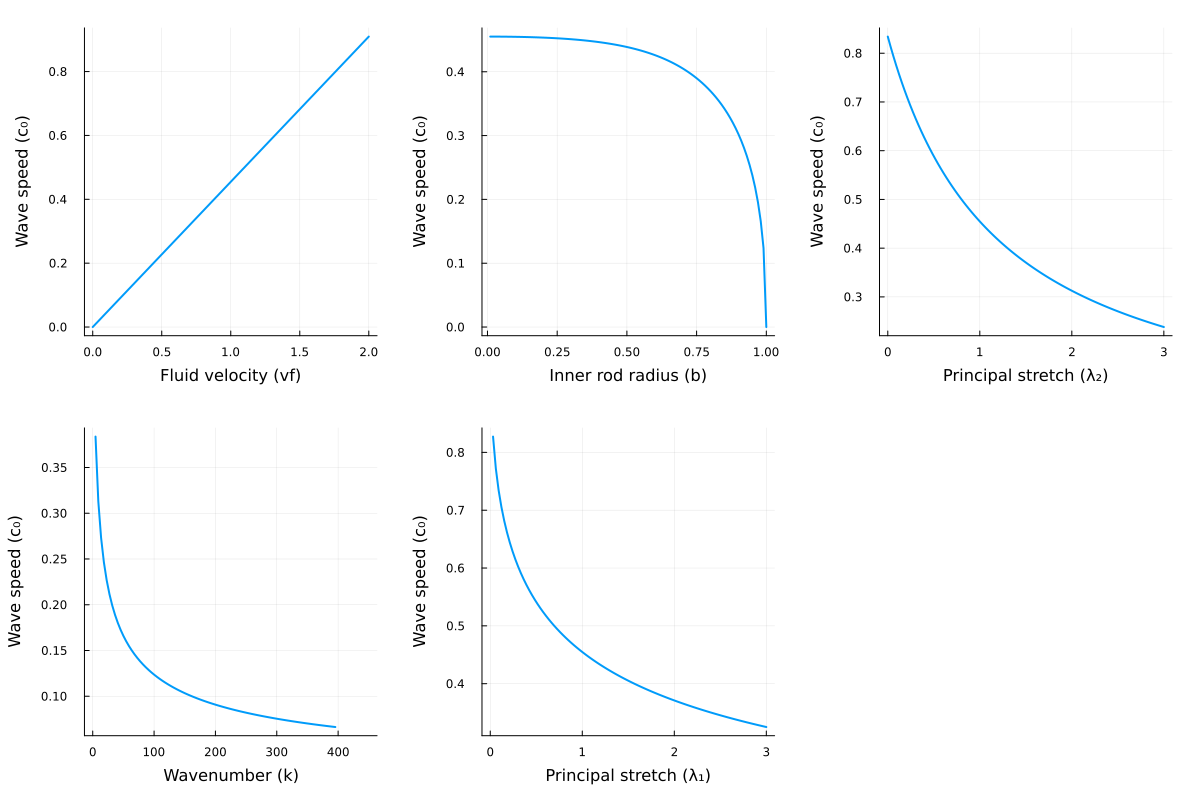

In [7]:
using Plots.PlotMeasures

# Default parameters
N = 36
L = π/2
n = 1
k = (n * π) / L               # Wavenumber
default_b = 0.1
default_λ1 = 1.0
default_λ2 = 1.0
default_vf = 1.0

# Parameter ranges
vf_range = range(0, 2.0, length=100)
b_range = range(0.01, 1.0, length=100)
λ2_range = range(0, 3.0, length=100)

# 1. Varying vf (fluid velocity)
c0_vs_vf = zeros(length(vf_range))
for (i, vf) in enumerate(vf_range)
    constants = fuConstants(N, L, default_b, default_λ1, default_λ2, vf)
    c0_vs_vf[i] = c0(k, constants)
end

# 2. Varying b (inner rod radius)
c0_vs_b = zeros(length(b_range))
for (i, b) in enumerate(b_range)
    constants = fuConstants(N, L, b, default_λ1, default_λ2, default_vf)
    c0_vs_b[i] = c0(k, constants)
end

# 3. Varying λ2 (principal stretches)
c0_vs_λ2 = zeros(length(λ2_range))
for (i, λ2) in enumerate(λ2_range)
    constants = fuConstants(N, L, default_b, default_λ1, λ2, default_vf)
    c0_vs_λ2[i] = c0(k, constants)
end

# Create plots
p1 = plot(vf_range, c0_vs_vf, 
    xlabel="Fluid velocity (vf)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

p2 = plot(b_range, c0_vs_b, 
    xlabel="Inner rod radius (b)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

p3 = plot(λ2_range, c0_vs_λ2, 
    xlabel="Principal stretch (λ₂)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)


# create one more plot where k is varied 
k_range = range(0, 450.0, length=100)
c0_vs_k = zeros(length(k_range))
for (i, j) in enumerate(k_range)
    constants = fuConstants(N, L, default_b, default_λ1, default_λ2, default_vf)
    c0_vs_k[i] = c0(j, constants)
end

p4 = plot(k_range, c0_vs_k, 
    xlabel="Wavenumber (k)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)


λ1_range = range(0, 3.0, length=100)
c0_vs_λ1 = zeros(length(λ1_range))
for (i, λ1) in enumerate(λ1_range)
    constants = fuConstants(N, L, default_b, λ1, default_λ2, default_vf)
    c0_vs_λ1[i] = c0(k, constants)
end

p5 = plot(λ1_range, c0_vs_λ1, 
    xlabel="Principal stretch (λ₁)", 
    ylabel="Wave speed (c₀)", 
    legend=false, lw=2)

# Display plots in a layout
plot(p1, p2, p3, p4, p5, layout=(2,3), size=(1200, 800), margin=20px)

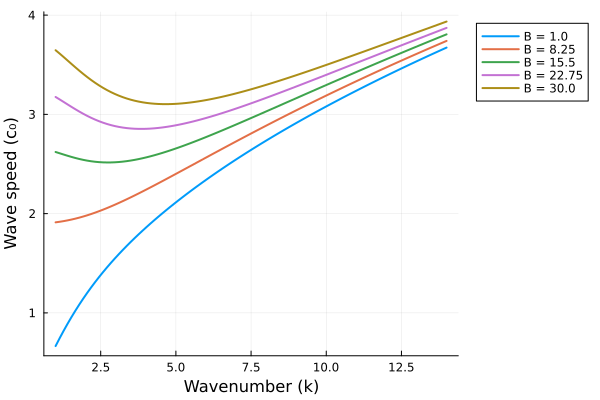

In [28]:
b = 0.1
B_range = range(1, 30, length=5)
L = π
N = 36

k_range = range(1, 14, length=100)
c0_vs_k = zeros(length(B_range), length(k_range))

for (n, B_val) in enumerate(B_range)

    # for (i, j) in enumerate(k_range)
    #     constants = ferrofluidConstants(N, L, B_val, b)
    #     c0_vs_k[n, i] = c0(j, constants)
    # end

    constants = ferrofluidConstants(N, L, B_val, b)
    c0_vs_k[n,:] = c0(k_range, constants)

end

p = plot(legend=:outertopright)
for (n, b) in enumerate(B_range)
    plot!(k_range, c0_vs_k[n,:], 
        xlabel="Wavenumber (k)", 
        ylabel="Wave speed (c₀)", 
        label="B = $(b)", lw=2)
end
display(p)

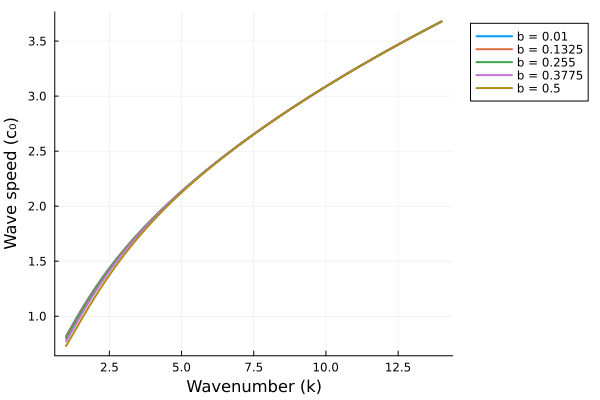

In [8]:
N = 36; L = π; B = 1.5; B = 1.5; b = 0.1
constants = ferrofluidConstants(N, L, B, b)

k_range = range(1, 14, length=100)

plot_dispersion(k_range, constants, vary_param = :b, param_range = range(0.01, 0.5, length=5))

**To Do:**

Saving Results: 
* Make sure everything is being saved correctly (_everything_) 
* Better file names
* Checking if solution already exists (option to stop the program and returns the filename) 

Plotting
* Individual plotting functions for each type of plot: 
    * wave profiles (3 on the same plot samples from different parts of the branch)
    * bifurcation branch (color bar for iterations taken)
    * error plot (across a branch / a1 values)
    * dispersion relation (for a vector of parameter values)

Solutions:
* more modes / resolution
* zero out modes (more frequently)

Precision
* Try using quadruple precision

Housekeeping/Speed: 
* Look through code line by line and: 
    * remove unnecessary computations
    * simplify + make it more readable 
    * minor speed improvments (probably lots of how hanging fruit)

New functionality: 
* Some way to do a parameter search (maybe even create own module)
    * computes branch for all combination of values 
    * keeps going even if there is an error — will need to predict the types of possible errors 
* Useful function to print the run details in a nice way


Error checking: 
* Check for and return error along with tolerance